<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/2_Regresja/6_Regresja_drzew_decyzyjnych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Regresja drzew decyzyjnych
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Regresja liniowa](#2)
4. [Regresja drzew decyzyjnych](#3)
5. [Graf drzewa decyzyjnego](#4)
6. [Model drzewa decyzyjnego - budowa funkcji](#5)

### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import make_regression

sns.set(font_scale=1.3)
np.random.seed(42)
np.printoptions(precission=6, suppress=True)

### <a name='1'></a> Wygenerowanie danych

In [2]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(f'{data[:5]}')
print(f'\n{target[:5]}')

[[ 1.85227818]
 [ 0.47359243]
 [-1.23086432]
 [ 0.62566735]
 [-0.07201012]]

[18795.44042574  3481.30166167  5866.34595782  3697.11653898
    78.96485415]


### <a name='2'></a> Regresja liniowa

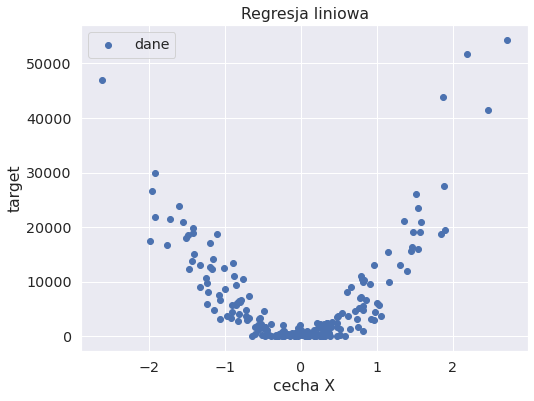

In [3]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.legend()
plt.show()

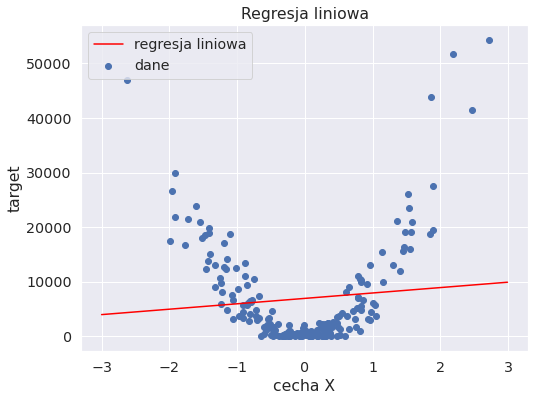

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_x = np.arange(-3, 3, 0.01).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.plot(plot_x, regressor.predict(plot_x), label='regresja liniowa', color='red')
plt.legend()
plt.show()

### <a name='3'></a> Regresja drzew decyzyjnych


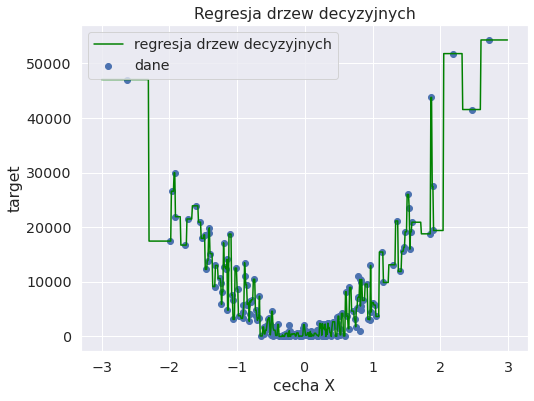

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.plot(plot_x, regressor.predict(plot_x), label='regresja drzew decyzyjnych', color='green')
plt.legend()
plt.show()

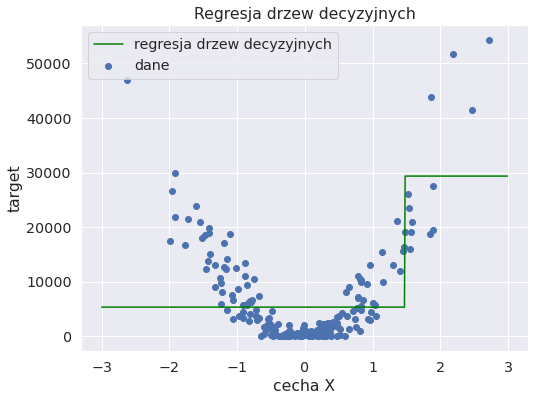

In [16]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 1
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.plot(plot_x, regressor.predict(plot_x), label='regresja drzew decyzyjnych', color='green')
plt.legend()
plt.show()

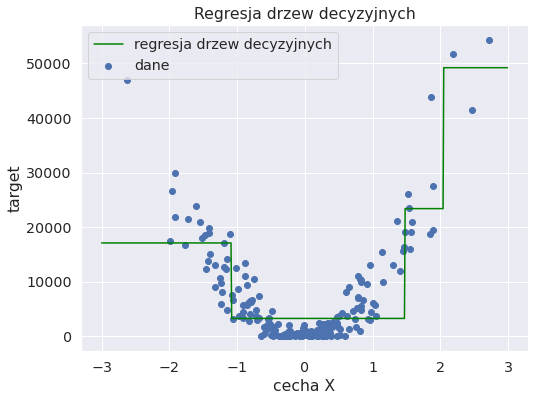

In [17]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 2
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.plot(plot_x, regressor.predict(plot_x), label='regresja drzew decyzyjnych', color='green')
plt.legend()
plt.show()

### <a name='5'></a> Model drzewa decyzyjnego - budowa funkcji

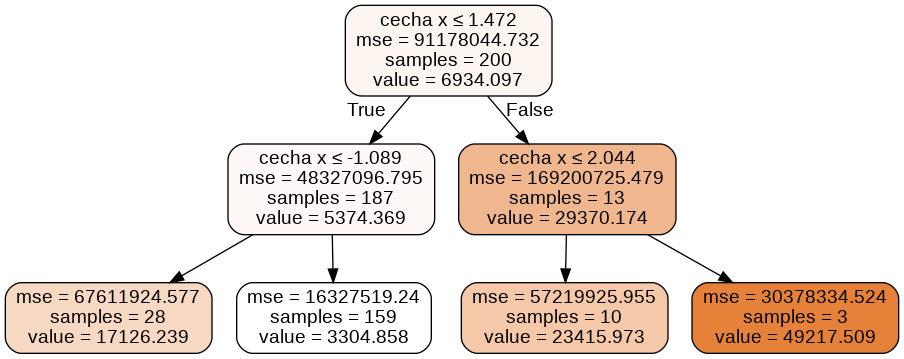

In [21]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

### <a name='5'></a> Model drzewa decyzyjnego - budowa funkcji

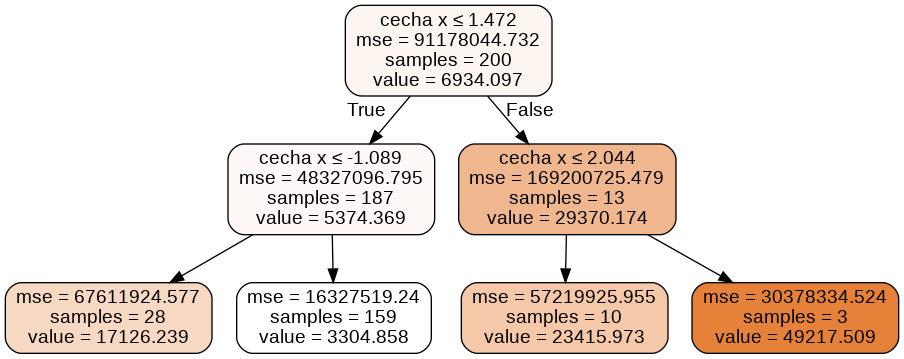

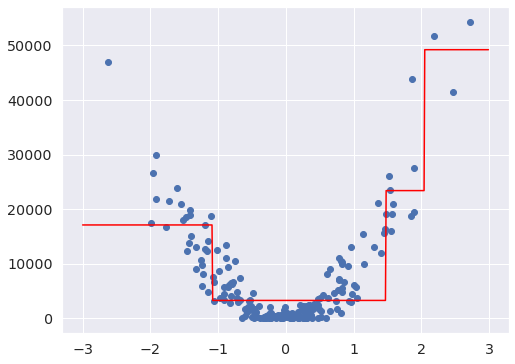

In [24]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.scatter(data, target)
    plt.plot(plot_x, regressor.predict(plot_x), color='red')

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=300 + max_depth * 100)

make_dt_regression(max_depth=2)

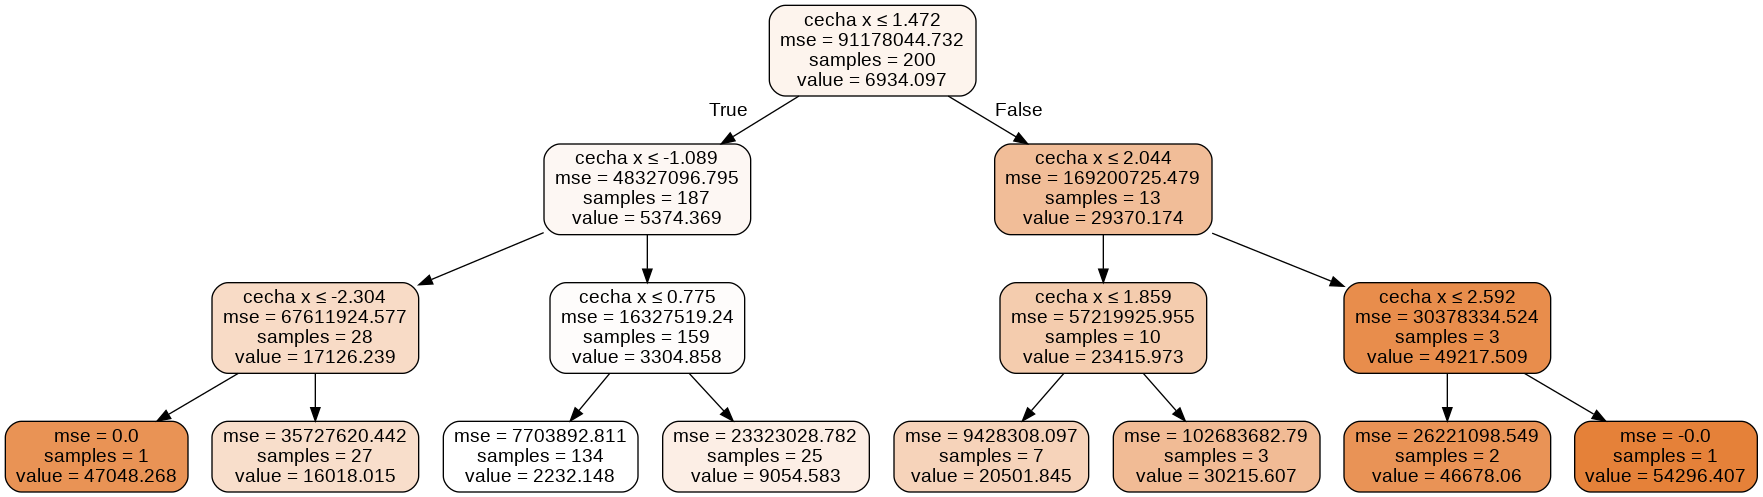

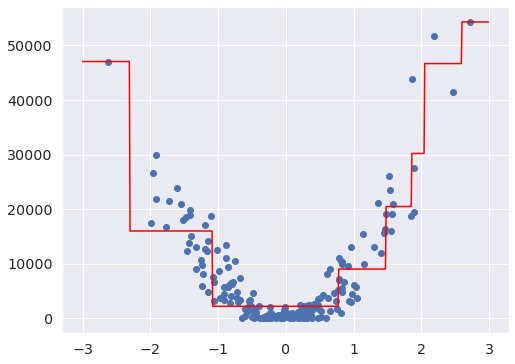

In [25]:
make_dt_regression(max_depth=3)

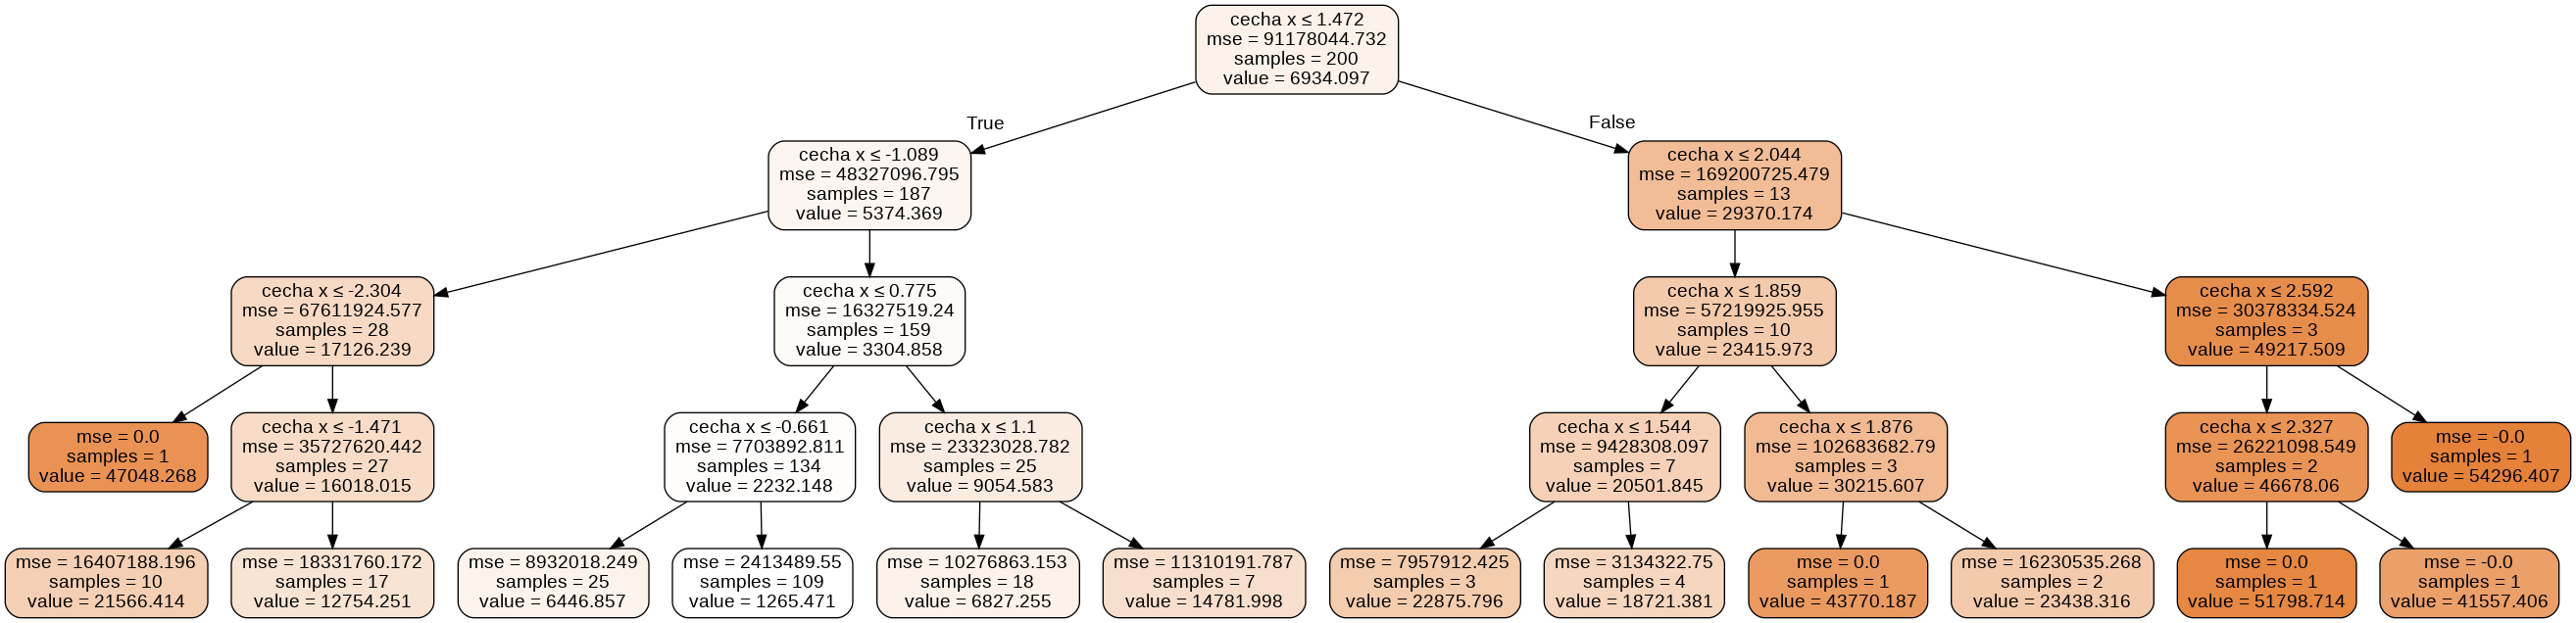

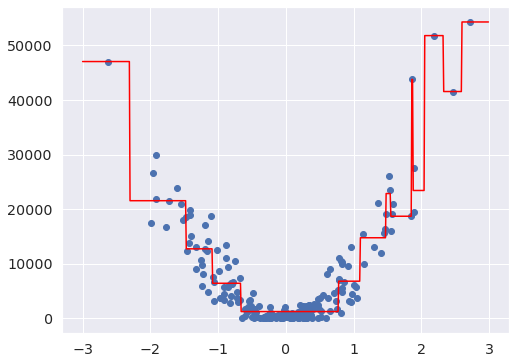

In [26]:
make_dt_regression(max_depth=4)